## 1. Import Libraries

In [23]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## 2. Load Dataset

In [2]:
df = pd.read_csv("50_Startups.csv")

## 3. Data Preprocessing

In [11]:
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


## 4. Train-Test Split

In [24]:
# One-hot encoder
X = pd.get_dummies(df.drop("Profit", axis=1), columns=["State"], drop_first=True)
Y = df["Profit"]

# Train-Test Split. An 80/20 split was used due to the small dataset size (50 observations).
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=3
)

## 5. Model Evaluation Function

In [25]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"{name}")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2  : {r2:.2f}")

## 6. Models

### 6.1 Decision Tree Regression

In [26]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_split=8, min_samples_leaf=5, random_state=3)

dt.fit(X_train, Y_train)

Y_pred_dt = dt.predict(X_test)

evaluate_model("Decision Tree", Y_test, Y_pred_dt)

Decision Tree
MAE : 13406.59
MSE : 278497983.93
RMSE: 16688.26
R2  : 0.84


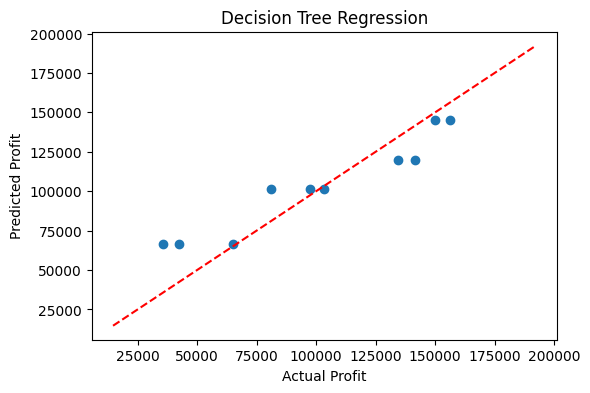

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(Y_test, Y_pred_dt)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "r--")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Decision Tree Regression")
plt.show()

### 6.2 Polynomial Regression

In [16]:
# Scale X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Linear regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

Y_pred_poly = poly_model.predict(X_test_poly)

evaluate_model("Polynomial Regression", Y_test, Y_pred_poly)

Polynomial Regression
MAE : 7109.74
MSE : 81658057.50
RMSE: 9036.48
R2  : 0.95


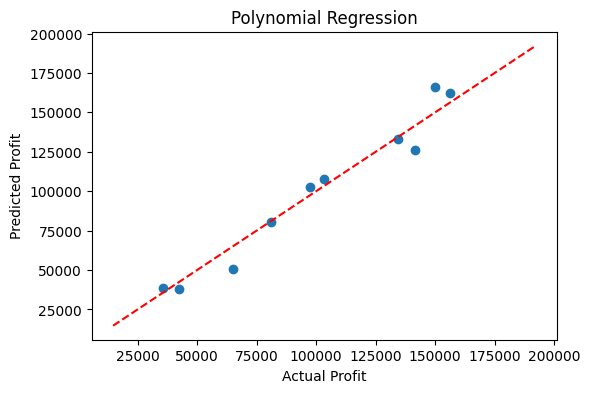

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(Y_test, Y_pred_poly)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "r--")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Polynomial Regression")
plt.show()

### 6.3 Random Forest Regression

In [18]:
rf = RandomForestRegressor(
    n_estimators=80,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=3
)

rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)

evaluate_model("Random Forest", Y_test, Y_pred_rf)

Random Forest
MAE : 10098.17
MSE : 200676887.86
RMSE: 14166.05
R2  : 0.89


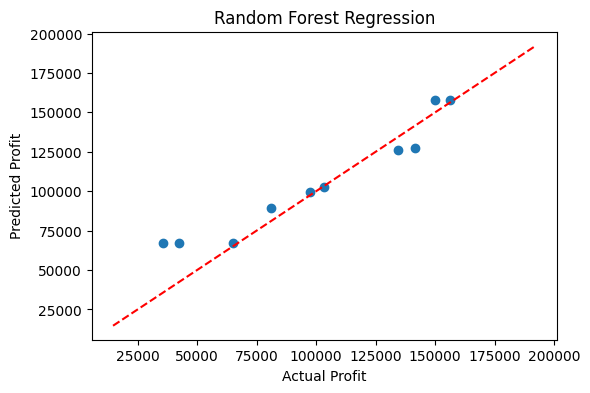

In [19]:
plt.figure(figsize=(6,4))
plt.scatter(Y_test, Y_pred_rf)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "r--")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Random Forest Regression")
plt.show()


### 6.4 Support Vector Regression

In [20]:
# Scale X
scaler_X = StandardScaler()
X_train_svr = scaler_X.fit_transform(X_train)
X_test_svr = scaler_X.transform(X_test)

# Scale Y
# Converts a pandas Series/DataFrame into a NumPy array
# reshape(-1, 1) is required because scikit-learn scalers expect 2D arrays
# ravel() flattens the array as SVR expects 1D target arrays

scaler_Y = StandardScaler()
Y_train_svr = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1)).ravel()

# SVR model
svr = SVR(kernel="rbf", C=10, gamma=0.01, epsilon=0.1)
svr.fit(X_train_svr, Y_train_svr)

# Predict and inverse transform. Otherwise, our predictions stay in scaled units, not real values.
Y_pred_svr_scaled = svr.predict(X_test_svr)
Y_pred_svr = scaler_Y.inverse_transform(Y_pred_svr_scaled.reshape(-1, 1)).ravel()

evaluate_model("Support Vector Regression", Y_test, Y_pred_svr)

Support Vector Regression
MAE : 9004.44
MSE : 133354897.97
RMSE: 11547.94
R2  : 0.92


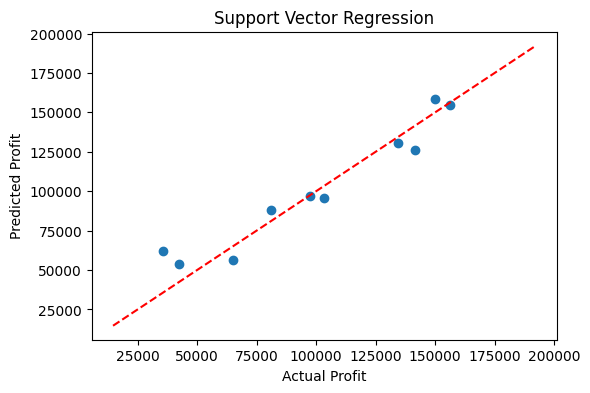

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(Y_test, Y_pred_svr)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], "r--")
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Support Vector Regression")
plt.show()

## 7. Model Comparison

In [31]:
# Create comparison table
results = pd.DataFrame({
    "Model": [
        "Decision Tree Regression",
        "Polynomial Regression",
        "Random Forest Regression",
        "Support Vector Regression"
    ],
    "MAE": [
        mean_absolute_error(Y_test, Y_pred_dt),
        mean_absolute_error(Y_test, Y_pred_poly),
        mean_absolute_error(Y_test, Y_pred_rf),
        mean_absolute_error(Y_test, Y_pred_svr)
    ],
    "MSE": [
        mean_squared_error(Y_test, Y_pred_dt),
        mean_squared_error(Y_test, Y_pred_poly),
        mean_squared_error(Y_test, Y_pred_rf),
        mean_squared_error(Y_test, Y_pred_svr)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(Y_test, Y_pred_dt)),
        np.sqrt(mean_squared_error(Y_test, Y_pred_poly)),
        np.sqrt(mean_squared_error(Y_test, Y_pred_rf)),
        np.sqrt(mean_squared_error(Y_test, Y_pred_svr))
    ],
    "R2 Score": [
        r2_score(Y_test, Y_pred_dt),
        r2_score(Y_test, Y_pred_poly),
        r2_score(Y_test, Y_pred_rf),
        r2_score(Y_test, Y_pred_svr)
    ]
})


results.sort_values(by="MAE", inplace=True)

print("\nFinal Model Comparison:")
print(results)


Final Model Comparison:
                       Model           MAE           MSE          RMSE  \
1      Polynomial Regression   7109.744788  8.165806e+07   9036.484798   
3  Support Vector Regression   9004.439137  1.333549e+08  11547.939122   
2   Random Forest Regression  10098.166440  2.006769e+08  14166.047009   
0   Decision Tree Regression  13406.587155  2.784980e+08  16688.258864   

   R2 Score  
1  0.953532  
3  0.924114  
2  0.885804  
0  0.841519  


## 8. Key Findings

- Polynomial Regression achieved the best performance (lowest MAE, highest R²)
- Tree-based models underperformed due to sensitivity to small datasets
- SVR offered strong generalisation with smooth decision boundaries
- R&D Spend was the dominant predictive feature
- MAE was prioritised due to interpretability in monetary terms
